In [48]:
import sys; sys.path.append("../src1")
from direct import Direct
import numpy as np, pygmo as pg, matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
%matplotlib inline

In [2]:
# boundary conditions
x0 = [0, 0, np.pi, 0]
xf = [1, 0, 0, 0]

In [3]:
# direct segment
seg = Direct(x0, xf, 20)

In [4]:
# solution guess
T = 3

# linear state guess
states = np.vstack((
    np.linspace(l, u, seg.N) for l,u in zip(seg.x0, seg.xf)
)).T

# random controls
controls = np.random.random(seg.N)

# decision vector
dv = seg.encode(T, states, controls)

In [5]:
# setup nonlinear programing problem with PyGMO and IPOPT
prob = pg.problem(seg)
pop  = pg.population(prob, 0)
pop.push_back(dv)
algo = pg.algorithm(pg.ipopt())
algo.set_verbosity(1)

In [6]:
# solve problem
pop = algo.evolve(pop)

In [19]:
times, h, states, controls = seg.decode(pop.champion_x)

In [43]:
cs = CubicSpline(times, states, bc_type="natural")
statesp = cs(np.linspace(times[0], times[-1], 400))

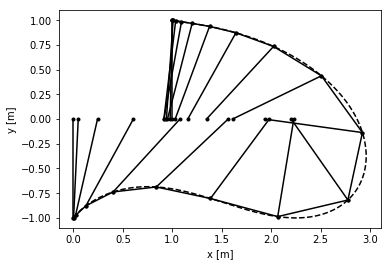

In [52]:
x = states[:,0] + np.sin(states[:,2])
y = np.cos(states[:,2])
xp = statesp[:,0] + np.sin(statesp[:,2])
yp = np.cos(statesp[:,2])

fig, ax = plt.subplots(1)
ax.plot(x, y, "k.-")
ax.plot(xp, yp, "k--")
for i in range(seg.N):
    ax.plot([x[i], states[i,0]],[y[i], 0], "k.-")
ax.set_aspect("equal")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
plt.show()

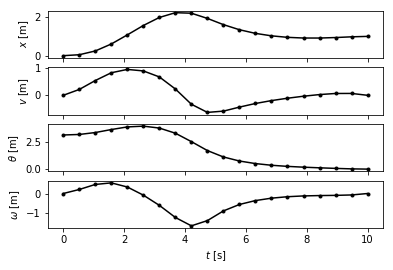

In [60]:
fig, ax = plt.subplots(seg.xdim, sharex=True)
labels = [r"$x$ [m]", r"$v$ [m]", r"$\theta$ [m]", r"$\omega$ [m]"]
for i in range(seg.xdim):
    ax[i].plot(times, states[:,i], "k.-")
    ax[i].set_ylabel(labels[i])
ax[-1].set_xlabel(r"$t$ [s]")
plt.show()

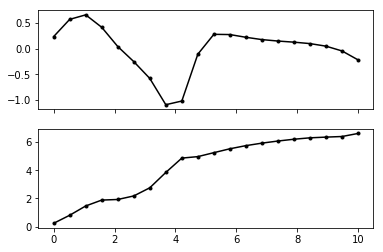

In [68]:
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(times, controls, "k.-")
ax[1].plot(times, np.cumsum(abs(controls)), "k.-")
plt.show()

In [51]:
pop.champion_x

array([10.        ,  0.        ,  0.        ,  3.14159265,  0.        ,
        0.23661329,  0.04821661,  0.21256801,  3.18886877,  0.20479268,
        0.57114515,  0.24325197,  0.53626413,  3.36622122,  0.46005485,
        0.65890009,  0.60558769,  0.8193906 ,  3.64198007,  0.54102962,
        0.41698047,  1.07733856,  0.94046703,  3.88379504,  0.33135557,
        0.04310996,  1.56474215,  0.88592163,  3.95525484, -0.08214508,
       -0.25038247,  1.98123281,  0.66804361,  3.77921635, -0.60088709,
       -0.577554  ,  2.22924203,  0.22955318,  3.30506784, -1.2164547 ,
       -1.08870964,  2.20256577, -0.32465847,  2.53032548, -1.64179746,
       -1.01729459,  1.93287274, -0.62022419,  1.70764591, -1.37601746,
       -0.10585512,  1.60960155, -0.57434079,  1.11763601, -0.88354833,
        0.28021202,  1.34591425, -0.42807606,  0.74561391, -0.55648972,
        0.27559395,  1.15633235, -0.29698938,  0.50912875, -0.35819304,
        0.22253542,  1.0287713 , -0.1916812 ,  0.35530415, -0.23

In [37]:
cs(times)

array([[ 0.00000000e+00,  0.00000000e+00,  3.14159265e+00,
         0.00000000e+00],
       [ 4.82166093e-02,  2.12568014e-01,  3.18886877e+00,
         2.04792677e-01],
       [ 2.43251965e-01,  5.36264133e-01,  3.36622122e+00,
         4.60054846e-01],
       [ 6.05587693e-01,  8.19390600e-01,  3.64198007e+00,
         5.41029621e-01],
       [ 1.07733856e+00,  9.40467030e-01,  3.88379504e+00,
         3.31355567e-01],
       [ 1.56474215e+00,  8.85921633e-01,  3.95525484e+00,
        -8.21450765e-02],
       [ 1.98123281e+00,  6.68043612e-01,  3.77921635e+00,
        -6.00887086e-01],
       [ 2.22924203e+00,  2.29553175e-01,  3.30506784e+00,
        -1.21645470e+00],
       [ 2.20256577e+00, -3.24658471e-01,  2.53032548e+00,
        -1.64179746e+00],
       [ 1.93287274e+00, -6.20224187e-01,  1.70764591e+00,
        -1.37601746e+00],
       [ 1.60960155e+00, -5.74340790e-01,  1.11763601e+00,
        -8.83548332e-01],
       [ 1.34591425e+00, -4.28076060e-01,  7.45613908e-01,
      